In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skrf as rf

Parameters

In [2]:
Z=np.array([25.5,123.6])
Z.astype(float)
w=np.array([800e-6,10e-6])
w.astype(float)
vp=np.array([0.337*3e8,0.383*3e8])
vp.astype(float)
alpha=123.6/25.5

In [3]:
f0=6e9
f=np.linspace(0.1,1e10,1000)
l_r=vp/f0/2
print(l_r*1e6) #length of LO-Z and HI-Z sections in µm


[8425. 9575.]


In [4]:
graph=[]
for k in range(1):
    graph.append(np.abs(np.cos(l_r[1]*2*np.pi*f/vp[1])*np.cos(l_r[0]*2*np.pi*f/vp[0])-
       (alpha+1/alpha)*np.sin(l_r[1]*2*np.pi*f/vp[1])*np.sin(l_r[0]*2*np.pi*f/vp[0])))


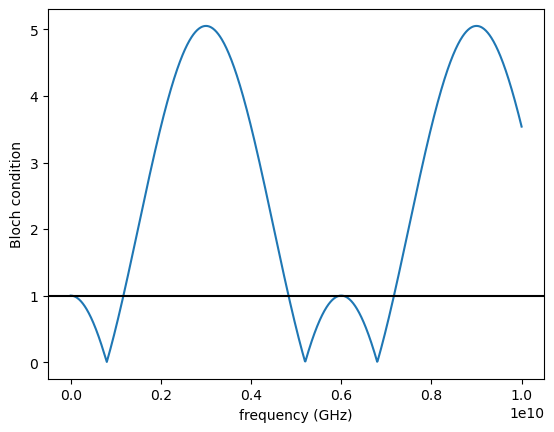

In [5]:
for k in range(1):
    plt.plot(f,graph[k])
    plt.axhline(y=1, color='k', linestyle='-')
    plt.xlabel("frequency (GHz)")
    plt.ylabel("Bloch condition")  
    plt.savefig('Bloch condition.svg')  

In [6]:
ind=np.where(graph[0]<1)[0]

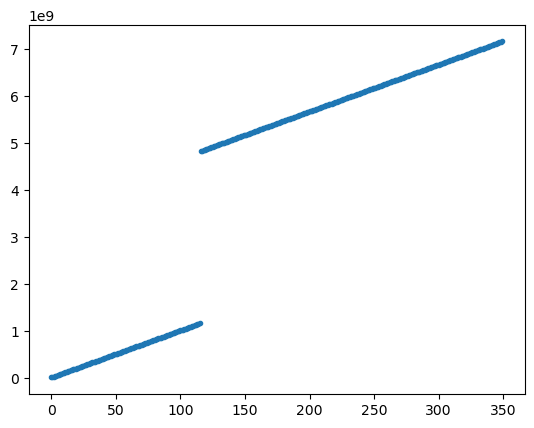

In [7]:
plt.plot(f[ind],'.')

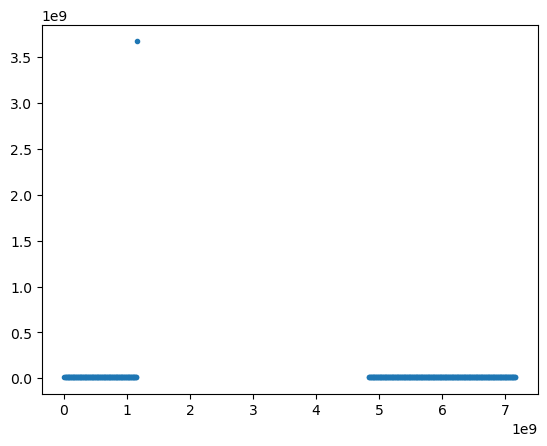

In [8]:
plt.plot(f[ind[:-1]],np.diff(f[ind]),'.')

In [9]:
discontinuities_idx = np.where(abs(np.diff(f[ind]))>1e9)[0] + 1

In [10]:
f[discontinuities_idx]

array([1.16116116e+09])

In [10]:
SIFP=rf.Network("../Sonnet_files/Filters/SIFPmicrostrip1.s2p")
freq =SIFP.frequency

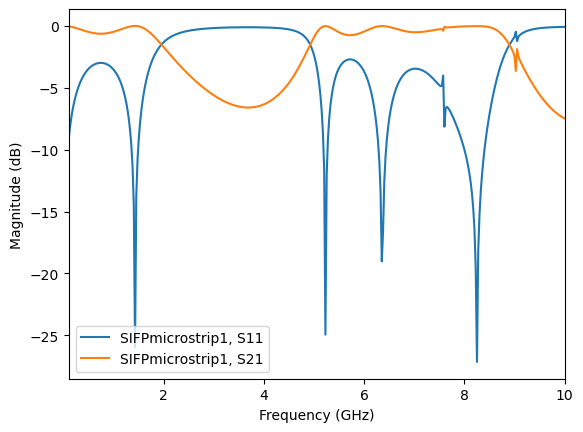

In [11]:
SIFP.plot_s_db10(0,0)
SIFP.plot_s_db10(1,0)